# Web Scraping for Data Science with Python

In [ ]:
%pip install -r https://raw.githubusercontent.com/vrughetti/python4DS/main/requirements.txt

In [41]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Table of Contents
1. Introduction to Web Scraping
2. The Beautiful Soup (bs4) Library
3. The Requests Library
4. Scraping Data from Wikipedia
5. Summary

## 1. Introduction to Web Scraping

Web scraping is the process of extracting data from websites using code. It is a powerful technique for collecting data from the web, which can be used in various Data Science applications. In this lesson, we will learn how to perform web scraping using Python.

## 2. The Beautiful Soup (bs4) Library

Beautiful Soup (bs4) is a Python library for parsing HTML and XML documents. It provides an easy-to-use interface to extract data from web pages. To use Beautiful Soup, we need to install it by running the following command:

```python
pip install beautifulsoup4
```

Once installed, we can import the library in our code:

```python
from bs4 import BeautifulSoup
```

## 3. The Requests Library

The Requests library is a Python library for making HTTP requests. It allows us to send GET and POST requests to web pages and retrieve their content. To install the Requests library, run the following command:

```python
pip install requests
```

We can import the library in our code as follows:

```python
import requests
```

## 4. Scraping Data from Wikipedia

In this example, we will scrape data from a Wikipedia page. Let's scrape the table of the highest-grossing films of all time. Follow the steps below:

### Step 1: Send a GET request to the webpage

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
response = requests.get(url)

We start by sending a GET request to the Wikipedia webpage that lists the highest-grossing films.

### Step 2: Parse the HTML content using Beautiful Soup

In [8]:
soup = BeautifulSoup(response.content, 'html.parser')

Using Beautiful Soup, we parse the HTML content of the webpage and create a BeautifulSoup object called `soup`.

### Step 3: Find the table on the webpage

In [12]:
table = soup.find('table', class_='wikitable')

We use the `find` method to locate the table element on the webpage. We specify the class attribute of the table element to identify it uniquely.

### Step 4: Extract information from the table

In [109]:
rows = table.find_all('tr')
data = []

for row in rows[1:]:
    columns = row.find_all('td')
    names = row.find('th')
    movie = names.text.strip()
    year = int(columns[3].text.strip())
    chars_to_remove = ['F8', 'F', 'HP1', 'T'] # fix for Wikipedia extra characters
    try:
        gross = columns[2].text.strip()
        for char in chars_to_remove:
            gross = gross.replace(char, '')
        gross = gross.replace('$', '')
        gross = int(gross)
    except:
        gross = columns[2].text.strip()
        for char in chars_to_remove:
            gross = gross.replace(char, '')
        gross = re.sub('[^0-9]', '', gross)
        gross = int(gross)
    data.append(
        {
            'Movie': movie,
            'Gross': gross, 
            'Year': year, 
            'Source': 'Wikipedia',
            'value': 'USD',
        })


We use the `find_all` method to find all the table rows (`tr` elements). We then loop through the rows and extract the movie title and gross revenue from the respective table cells (td elements). We store the data as dictionaries in a list.

### Step 5: Store the data in a DataFrame

In [110]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Movie   50 non-null     object
 1   Gross   50 non-null     int64 
 2   Year    50 non-null     int64 
 3   Source  50 non-null     object
 4   value   50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


In [111]:
df.head()

,Movie,Gross,Year,Source,value
0,Avatar,2923706026,2009,Wikipedia,USD
1,Avengers: Endgame,2797501328,2019,Wikipedia,USD
2,Avatar: The Way of Water,2320250281,2022,Wikipedia,USD
3,Titanic,2257844554,1997,Wikipedia,USD
4,Star Wars: The Force Awakens,2068223624,2015,Wikipedia,USD


We create a DataFrame using the Pandas library to store the scraped data. Each movie's title and gross revenue are stored in separate columns.

In [112]:
df.sort_values(by='Gross', ascending=False).head(10)

,Movie,Gross,Year,Source,value
0,Avatar,2923706026,2009,Wikipedia,USD
1,Avengers: Endgame,2797501328,2019,Wikipedia,USD
2,Avatar: The Way of Water,2320250281,2022,Wikipedia,USD
3,Titanic,2257844554,1997,Wikipedia,USD
4,Star Wars: The Force Awakens,2068223624,2015,Wikipedia,USD
5,Avengers: Infinity War,2048359754,2018,Wikipedia,USD
6,Spider-Man: No Way Home,1921847111,2021,Wikipedia,USD
7,Jurassic World,1671537444,2015,Wikipedia,USD
8,The Lion King,1656943394,2019,Wikipedia,USD
9,The Avengers,1518815515,2012,Wikipedia,USD


As we can see, the film `Avatar (2009)` is the highest-grossing film of all time, with a gross revenue of `$2,923,706,026`.

<Axes: title={'center': 'Top 10 Highest Grossing Movies'}, ylabel='Gross (USD)'>

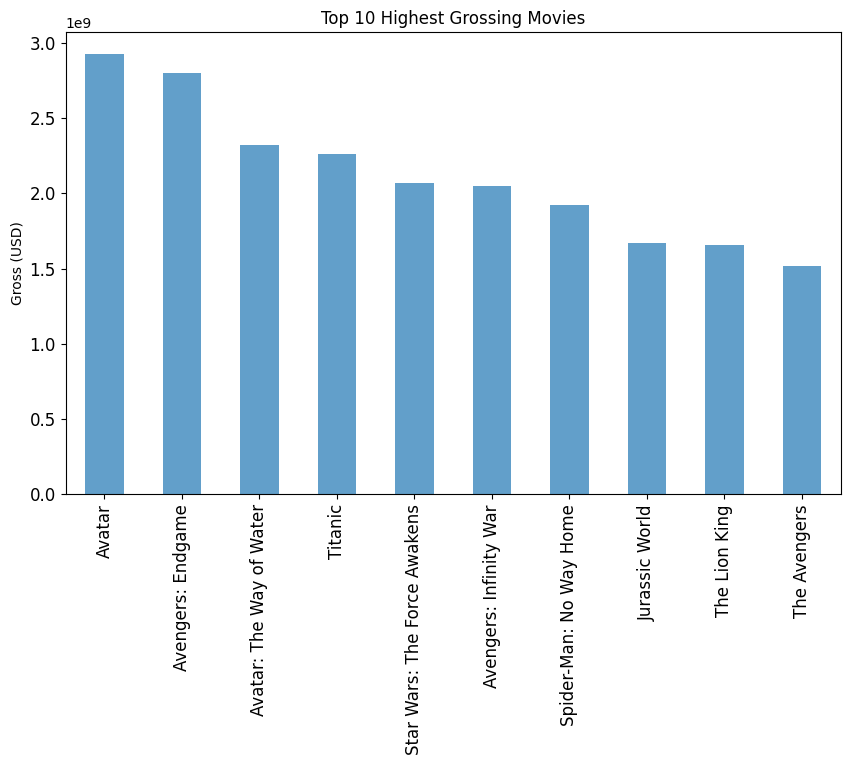

In [113]:
df.sort_values(by='Gross', ascending=False).head(10).plot.bar(
    x='Movie', 
    y='Gross', 
    rot=90,
    title='Top 10 Highest Grossing Movies',
    figsize=(10, 6),
    fontsize=12,
    alpha=0.7,
    legend=False,
    ylabel='Gross (USD)',
    xlabel='',
)

<Axes: title={'center': 'Gross by Year'}, xlabel='Year', ylabel='Gross (USD)'>

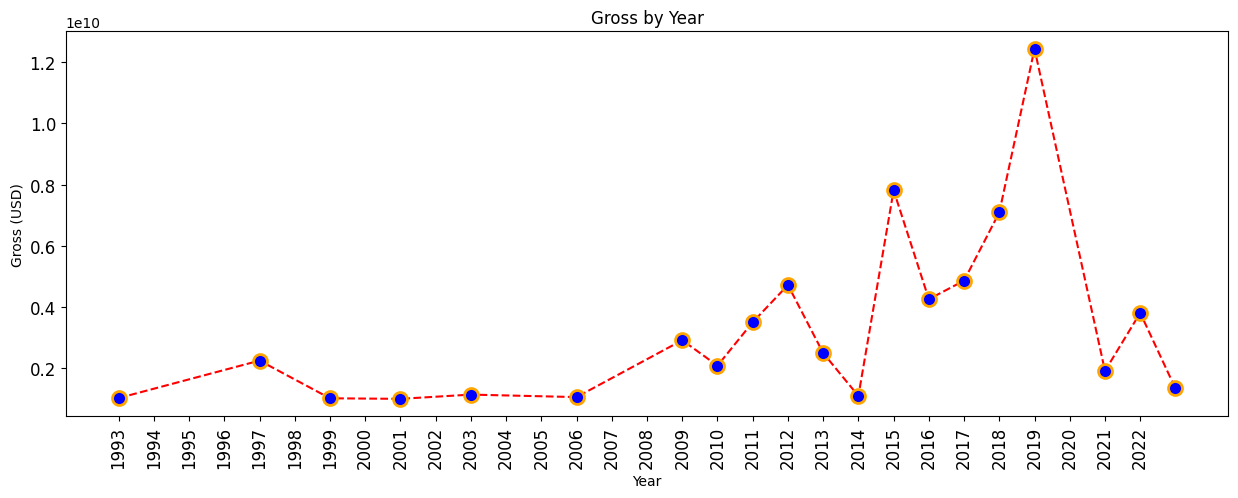

In [119]:
df.groupby('Year').sum().plot(
    kind='line', 
    y='Gross', 
    figsize=(15, 5),
    rot=90,
    title='Gross by Year',
    ylabel='Gross (USD)',
    legend=False,
    fontsize=12,
    color='red',
    linestyle='--',
    marker='o',
    markerfacecolor='blue',
    markersize=10, 
    markeredgewidth=2,
    markeredgecolor='orange',
    xticks=range(df['Year'].min(), df['Year'].max(), 1),
)

Also `2019` is the year with the highest-grossing films of our dataset:

In [118]:
# Films that are from 2019 and are in the top 10
df.sort_values(by='Gross', ascending=False).iloc[:10].query('Year == 2019')

,Movie,Gross,Year,Source,value
1,Avengers: Endgame,2797501328,2019,Wikipedia,USD
8,The Lion King,1656943394,2019,Wikipedia,USD


Since `Avengers: Endgame` was already the second highest-grossing film, it is not surprising that `2019` is the year with the highest-grossing films of our dataset.

Here there is the entire list of films of `2019`:

In [142]:
df[df['Year'] == 2019]

,Movie,Gross,Year,Source,value
1,Avengers: Endgame,2797501328,2019,Wikipedia,USD
8,The Lion King,1656943394,2019,Wikipedia,USD
12,Frozen II,1450026933,2019,Wikipedia,USD
28,Spider-Man: Far From Home,1131927996,2019,Wikipedia,USD
29,Captain Marvel,1128274794,2019,Wikipedia,USD
34,Joker,1074458282,2019,Wikipedia,USD
35,Star Wars: The Rise of Skywalker,1074144248,2019,Wikipedia,USD
36,Toy Story 4,1073394593,2019,Wikipedia,USD
40,Aladdin,1050693953,2019,Wikipedia,USD


## 5. Summary

In this lesson, we learned how to perform web scraping using Python. We explored the Beautiful Soup (bs4) library for parsing HTML, the Requests library for making HTTP requests, and the process of scraping data from a Wikipedia page. Web scraping is a valuable skill for Data Science, enabling us to collect data from websites and utilize it for various analysis and modeling tasks.

Feel free to experiment with different websites and data extraction techniques to further enhance your web scraping skills. Remember to respect website terms of service and avoid scraping websites that prohibit it. Happy scraping!

---

# What's Next?

If you have reached this point, congratulations! You have completed the course. 

We hope you enjoyed it and learned a lot. Now you can apply your new skills to real-world problems and build amazing projects.

Congrats and well done! 👏👏👏